In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [4]:
import caiman as cm
from caiman.source_extraction.cnmf import cnmf

c:\Users\HyperPC_Smee\anaconda3\envs\optic_310\lib\site-packages\caiman\__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [110]:
# path_caiman_h5 = "../data/caiman_results/demo_pipeline_results.hdf5"
path_caiman_h5 = "../data/caiman_results/KA91-f2-z130_240331_2-preWsk4bit--HfixWskVib_1-4000_reg.hdf5"
cnmf_result = cnmf.load_CNMF(path_caiman_h5)
correlation_image = cnmf_result.estimates.Cn

In [129]:
cnmf_result.params

CNMFParams:

data:

{'caiman_version': '1.11.4',
 'decay_time': 0.4,
 'dims': (512, 512),
 'dxy': (0.64, 0.64),
 'fnames': array([b'../../example_movies/KA91-f2-z130_240331_2-preWsk4bit--HfixWskVib_1-4000_reg.tif'],
      dtype='|S80'),
 'fr': 30,
 'last_commit': 'RELEASE-1.11.4',
 'var_name_hdf5': 'mov'}

init:

{'K': 4,
 'SC_kernel': 'heat',
 'SC_nnn': 20,
 'SC_normalize': True,
 'SC_sigma': 1,
 'SC_thr': 0,
 'SC_use_NN': False,
 'alpha_snmf': 0.5,
 'center_psf': False,
 'gSig': array([4, 4]),
 'gSiz': array([9, 9]),
 'init_iter': 2,
 'kernel': None,
 'lambda_gnmf': 1,
 'maxIter': 5,
 'max_iter_snmf': 500,
 'method_init': 'greedy_roi',
 'min_corr': 0.85,
 'min_pnr': 20,
 'nIter': 5,
 'nb': 2,
 'normalize_init': True,
 'options_local_NMF': None,
 'perc_baseline_snmf': 20,
 'ring_size_factor': 1.5,
 'rolling_length': 100,
 'rolling_sum': True,
 'seed_method': 'auto',
 'sigma_smooth_snmf': (0.5, 0.5, 0.5),
 'snmf_l1_ratio': 0.0,
 'ssub': 1,
 'ssub_B': 2,
 'tsub': 1}

merging:

{'do_merg

In [135]:
cnmf_result.params.data["fr"]

30

In [111]:
estimates = cnmf_result.estimates
dims = cnmf_result.dims
print(dims)

(512, 512)


In [112]:
np.reshape(estimates.A[:,i].toarray(), dims, order='F')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

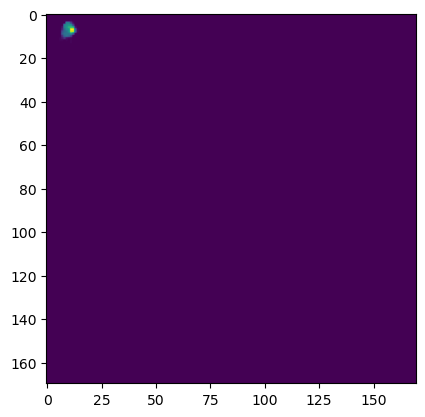

In [34]:
idx_components = [0, 1, 2]
plt.figure(); plt.imshow(np.reshape(estimates.A[:,idx_components[0]].toarray(), dims, order='F'))

In [47]:
np.unique(roi_2d)

array([0.        , 0.00226071, 0.00251588, 0.00261963, 0.0027076 ,
       0.00273403, 0.00292469, 0.00330068, 0.00343994, 0.00346212,
       0.00354531, 0.00355859, 0.00377713, 0.00381761, 0.00411512,
       0.00452529, 0.00457478, 0.00490652, 0.0052652 , 0.00578429,
       0.00593178, 0.00652184, 0.00703115, 0.00749871, 0.0079233 ,
       0.00890896, 0.00935796, 0.00946819, 0.01003122, 0.01004234,
       0.010294  , 0.01042791, 0.01046387, 0.01079138, 0.01649714,
       0.02102092, 0.02160591, 0.0221678 , 0.02280201, 0.02318769,
       0.02458157, 0.02580133, 0.03178822, 0.03256056, 0.03803839,
       0.03994245, 0.04001621, 0.04092727, 0.04865114, 0.05216902,
       0.05493071, 0.05863022, 0.05982387, 0.06226588, 0.08602803,
       0.09133569, 0.0921474 , 0.10257432, 0.10404294, 0.10942146,
       0.13336481, 0.14526431, 0.15134226, 0.15137274, 0.15230289,
       0.15718799, 0.16279686, 0.16302776, 0.16881751, 0.17499665,
       0.18480857, 0.18762062, 0.19872262, 0.2251259 , 0.22745

In [114]:
C = cnmf_result.estimates.C
C.shape

(1669, 4000)

In [113]:
cnmf_result.estimates.b.shape

(262144, 2)

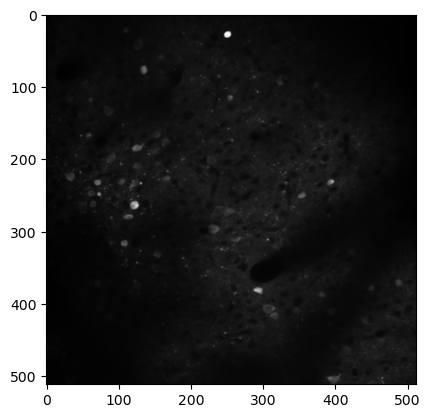

In [126]:
b = cnmf_result.estimates.b
f = cnmf_result.estimates.f
dims = cnmf_result.estimates.dims

bg_mean = np.reshape(b.dot(f.mean(1)), dims, order='F')

plt.figure(); plt.imshow(bg_mean, cmap="gray")
plt.show()

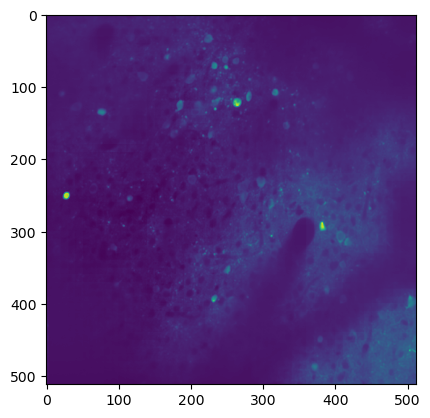

In [123]:
b = cnmf_result.estimates.b

b = np.reshape(b, (dims[0], dims[1], 2))
b = np.sum(b, axis=2)
plt.imshow(b)
plt.show()

In [94]:
dir(cnmf_result.estimates)

['A',
 'A_thr',
 'Ab',
 'Ab_dense',
 'AtA',
 'AtY_buf',
 'C',
 'CC',
 'CY',
 'C_on',
 'Cf',
 'Cn',
 'F_dff',
 'OASISinstances',
 'R',
 'S',
 'SNR_comp',
 'W',
 'YrA',
 'Yr_buf',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'b',
 'b0',
 'bl',
 'c1',
 'center',
 'cnn_preds',
 'compute_background',
 'compute_residuals',
 'coordinates',
 'deconvolve',
 'detrend_df_f',
 'dims',
 'discarded_components',
 'ecc',
 'evaluate_components',
 'evaluate_components_CNN',
 'f',
 'filter_components',
 'g',
 'groups',
 'hv_view_components',
 'idx_components',
 'idx_components_bad',
 'ind_new',
 'lam',
 'make_color_movie',
 'manual_merge',
 'masks_2_neurofinder',
 'merge_components',


In [84]:
# 空間成分と次元を取得
A = cnmf_result.estimates.A
dims = cnmf_result.estimates.dims
height, width = dims

# 受け入れられた成分のインデックス
idx_components = cnmf_result.estimates.idx_components
idx_components = np.arange(A.shape[1])

stat = {}

# 各ROIについて処理
for idx in idx_components:
    # 特定のROIの空間成分を取得
    roi_spatial = A[:, idx].toarray().flatten()
    
    # 2D画像として再構成
    roi_2d = roi_spatial.reshape(dims)

    # CaImAnのデフォルト: 最大値の20%以上のピクセル
    threshold = roi_2d.max() * 0.2
    
    # 非ゼロピクセルの座標を取得
    xpix, ypix = np.where(roi_2d > threshold)
    
    # Suite2p形式の辞書を作成
    roi_dict = {
        'ypix': ypix,
        'xpix': xpix,
    }
    
    stat[idx] = roi_dict

# 確認
print(f"Total ROIs: {len(stat)}")
print(f"First ROI: {stat[0]}")

Total ROIs: 155
First ROI: {'ypix': array([ 8,  9,  5,  6,  7,  8,  9, 10,  4,  5,  6,  7,  8,  9, 10,  4,  5,
        6,  7,  8,  9, 10,  4,  5,  6,  7,  8,  9, 10,  5,  6,  7,  8,  9,
        7,  8], dtype=int64), 'xpix': array([ 7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       13, 13], dtype=int64)}


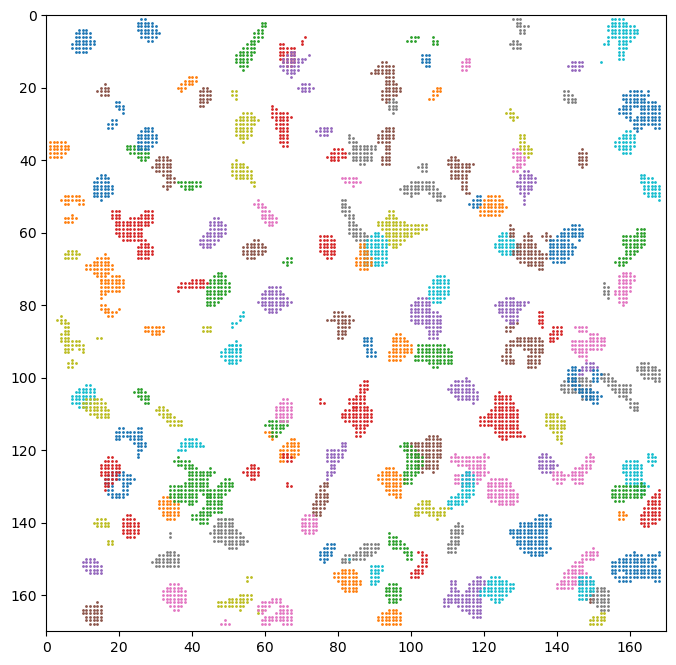

In [86]:
plt.figure(figsize=(8, 8))
for idx in stat.keys():
    ypix = stat[idx]['ypix']
    xpix = stat[idx]['xpix']
    plt.scatter(xpix, ypix, s=1)
plt.xlim(0, width)
plt.ylim(0, height)
plt.gca().invert_yaxis()
plt.show()

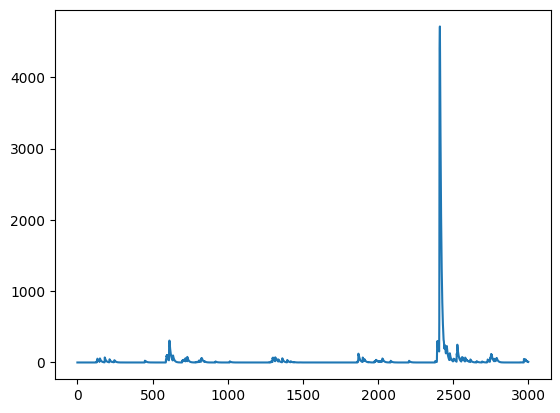

In [ ]:
# C
# calcium traces
C = data["estimates"]["C"]

plt.plot(C[0])
plt.show()

In [46]:
# A
A_dict = f['estimates']['A']

# CSC形式のスパース行列を再構築
A = csc_matrix(
    (A_dict['data'][:], A_dict['indices'][:], A_dict['indptr'][:]),
    shape=A_dict['shape'][:]
)

# 密行列に変換
A_dense = A.toarray()


In [52]:
# i番目のROIを画像として表示
dims = (512, 512)  # 画像の次元
roi_i = A[:, i].toarray()  # i番目の列（ROI）を取得
roi_image = np.reshape(roi_i, dims, order='F')

NameError: name 'i' is not defined